<a href="https://colab.research.google.com/github/HoaMacDanh/BA/blob/main/Group_Work_Session_12_Telepass_From_Tolling_to_Mobility_Platform%EC%9D%98_%EC%82%AC%EB%B3%B8_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Group Member Names:**

# **Case:** Telepass: From Tolling to Mobility Platform

## Data

The data provide a sample of insurance policies offered to Telepass users in the first half of 2020. Each user received at most one insurance policy offer. We have information about the customer, their car, the insurance policy details, and whether the policy was purchased.

The variables in the dataset are the following:
*   `client_id`: Identifier for the customer. Since each customer is offered at most one policy quote, each row in the data has a different `client_id`.
*   `driving_type`: This variable denotes the age group of the customer. It can take three values: `less_than_23`; `between_23_and_25`; and `more_than_25`.
*   `car_immatriculation_date`: Car registration date.
*   `car_brand`: Car brand.
*   `car_model`: Car model.
*   `insurance_expires_at`: Date when current insurance expires, when available.
*   `birth_date`: Birthday of the customer.
*   `gender`: Gender of the customer (M, F) when available.
*   `county`: Italian county of residence of the customer.
*   `base_subscription`: Date when customer signed up for Telepass base subscription.
*   `base_type`: This variable can take two values: FA for a Telepass family
subscription; OR for a Telepass company subscription.
*   `pay_subscription`: Date when customer signed up for TelepassPay subscription. If empty, the customer never signed up for a TelepassPay subscription.
*   `pay_cancellation`: Date when customer canceled their TelepassPay subscription. If empty, the customer never signed up for a TelepassPay subscription. If equal to "12/31/9998" the subscription is currently active.
*   `premium_subscription`: Date when customer signed up for Telepass Premium subscription. If empty, the customer never signed up for a Telepass Premium subscription.
*   `premium_cancellation`: Date when customer canceled their Telepass Premium subscription. If empty, the customer never signed up for a Telepass Premium subscription. If equal to "12/31/9998" the subscription is currently active.
*   `operating_system`: Mobile operating system of the customer, when available: and stands for Android; ios stands for iOS.
*   `policy_quoted_at`: Date when the insurance policy was quoted to the customer.
*   `broker_id`: Identifier for the insurance company offering the quote.
*   `roadside_assistance`: This variable takes value 1 if roadside assistance is
included in the quote, 0 otherwise.
*   `price_sale`: Insurance premium for the minimum required insurance, inclusive of any price discounts offered during the quote. In Euros.
*   `price_full`: Insurance premium for the minimum required insurance, excluding any price discounts offered during the quote. In Euros.
*   `discount_percent`: Price discount offered. It is equal to (1 -
price_sale/price_full).
*   `issued` (**only in the training data**): This variable is equal to TRUE if the insurance policy quoted was
purchased by the customer, FALSE otherwise.

The following variables take values TRUE or FALSE depending on whether a particular optional component of insurance was offered in the quote:   `driver_injury`, `basic_coverage`, `legal_protection`, `waive_right_compensation`, `uninsured_vehicles`, `protected_bonus`, `windows`, `natural_events`, `theft_fire`, `kasko`, `license_revoked`, `collision`, `vandalism`, `key_loss`.

### Trainining data

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/songheek/BA/main/telepass_train.csv'
df = pd.read_csv(url)
df.head()

,client_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,...,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent,issued
0,42803,more_than_26,3/1/2007,FIAT - INNOCENTI,FIAT CROMA,1/22/2020,NaN,NaN,MS,11/12/2012,...,1,0,0,1,0,0,271.25,306.80,0.115874,0
1,66562,more_than_26,7/25/2017,FIAT - INNOCENTI,FIAT PANDA,7/25/2020,2/9/1996,M,NaN,9/12/2017,...,0,0,0,0,0,0,2185.38,2204.87,0.008840,0
2,46676,between_23_and_25,3/14/2016,AUDI,Q2,4/3/2020,NaN,NaN,PI,1/26/2016,...,1,1,0,1,1,0,1121.83,1180.57,0.049756,0
3,53963,more_than_26,3/30/2017,MINI,COUNTRYMAN ONE D,4/18/2020,NaN,NaN,MS,5/24/2011,...,1,0,0,1,0,0,345.63,390.43,0.114745,0
4,51199,more_than_26,12/18/2013,BMW,X1 XDRIVE20D,4/17/2020,1/7/1977,M,LU,12/12/2017,...,1,1,1,0,0,0,887.75,896.85,0.010147,0


#### Preprocessing + EDA

In [2]:
df=df.drop(columns=['client_id','car_brand','car_model','birth_date','gender','county','operating_system','pay_subscription','premium_subscription','car_immatriculation_date','base_subscription','basic_coverage'])

In [3]:
df['policy_quoted_at'] = pd.to_datetime(df['policy_quoted_at'])
df['insurance_expires_at'] = pd.to_datetime(df['insurance_expires_at'])

# 'Days_Ahead' 열에 날짜 차이 계산하여 추가
df['Days_Ahead'] = df['policy_quoted_at'] - df['insurance_expires_at']

map_dict = {'FA' : 0, 'OR' : 1}
df['base_type'] = df['base_type'].map(map_dict).astype(int)

df['pay_cancellation'] = df['pay_cancellation'].apply(lambda x: 1 if x == '12/31/9998' else 0)
df['premium_cancellation'] = df['premium_cancellation'].apply(lambda x: 1 if x == '12/31/9998' else 0)

In [4]:
df['driving_type'] = df['driving_type'].map({'less_than_23':0, 'between_23_and_25':1, 'more_than_26':2})

In [5]:
df['Days_Ahead'] = df['Days_Ahead'].astype(int)

In [6]:
df=df.drop(columns=['insurance_expires_at','policy_quoted_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25321 entries, 0 to 25320
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driving_type              25321 non-null  int64  
 1   base_type                 25321 non-null  int64  
 2   pay_cancellation          25321 non-null  int64  
 3   premium_cancellation      25321 non-null  int64  
 4   broker_id                 25321 non-null  int64  
 5   roadside_assistance       25321 non-null  int64  
 6   driver_injury             25321 non-null  int64  
 7   legal_protection          25321 non-null  int64  
 8   waive_right_compensation  25321 non-null  int64  
 9   uninsured_vehicles        25321 non-null  int64  
 10  protected_bonus           25321 non-null  int64  
 11  windows                   25321 non-null  int64  
 12  natural_events            25321 non-null  int64  
 13  theft_fire                25321 non-null  int64  
 14  kasko 

In [8]:
X_train = df.drop(columns=['issued'])
y_train = df['issued']

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

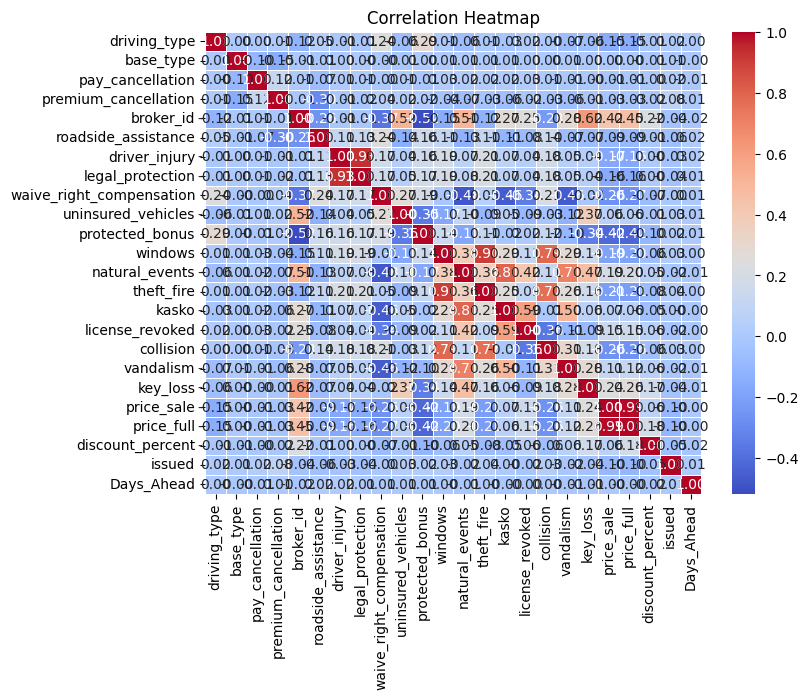

In [10]:
correlation_matrix = df.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Test data

In [11]:
url_test = 'https://raw.githubusercontent.com/songheek/BA/main/telepass_test.csv'
df_test = pd.read_csv(url_test)
df_test.head()

,client_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,...,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent
0,56459,more_than_26,7/20/2011,FORD,C-MAX,6/12/2020,NaN,NaN,FC,6/24/2019,...,0,1,0,0,1,0,0,325.48,325.48,0.000000
1,53455,more_than_26,8/30/2017,NISSAN,NISSAN QASHQAI,10/2/2020,9/22/1992,M,SA,8/26/2019,...,0,0,0,0,0,0,0,640.84,684.01,0.063113
2,66823,more_than_26,12/19/2006,FIAT - INNOCENTI,FIAT PUNTO,10/13/2020,1/8/2000,M,CN,8/29/2019,...,0,1,0,0,1,0,0,207.68,231.20,0.101730
3,62556,more_than_26,10/18/2017,KIA,SPORTAGE,6/6/2020,NaN,NaN,LT,6/4/2015,...,1,1,0,0,1,1,1,446.76,698.18,0.360108
4,58736,more_than_26,6/23/2002,SKODA,Unknown,2/26/2020,7/22/1969,M,BG,6/24/2016,...,0,0,0,0,0,0,0,185.13,192.21,0.036835


In [12]:
df_test=df_test.drop(columns=['client_id','car_brand','car_model','birth_date','gender','county','operating_system','pay_subscription','premium_subscription','car_immatriculation_date','base_subscription','basic_coverage'])

In [13]:
df_test['pay_cancellation']

0               NaN
1        12/31/9998
2               NaN
3               NaN
4        12/31/9998
            ...    
10847    12/31/9998
10848           NaN
10849           NaN
10850           NaN
10851           NaN
Name: pay_cancellation, Length: 10852, dtype: object

In [14]:
df_test['policy_quoted_at'] = pd.to_datetime(df_test['policy_quoted_at'])
df_test['insurance_expires_at'] = pd.to_datetime(df_test['insurance_expires_at'])

# 'Days_Ahead' 열에 날짜 차이 계산하여 추가
df_test['Days_Ahead'] = df_test['policy_quoted_at'] - df_test['insurance_expires_at']

map_dict = {'FA' : 0, 'OR' : 1}
df_test['base_type'] = df_test['base_type'].map(map_dict).astype(int)

df_test['pay_cancellation'] = df_test['pay_cancellation'].apply(lambda x: 1 if x == '12/31/9998' else 0)
df_test['premium_cancellation'] = df_test['premium_cancellation'].apply(lambda x: 1 if x == '12/31/9998' else 0)

In [15]:
df_test['driving_type'] = df_test['driving_type'].map({'less_than_23':0, 'between_23_and_25':1, 'more_than_26':2})

In [16]:
df_test['Days_Ahead'] = df_test['Days_Ahead'].astype(int)

In [17]:
df_test=df_test.drop(columns=['insurance_expires_at','policy_quoted_at'])

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driving_type              10852 non-null  int64  
 1   base_type                 10852 non-null  int64  
 2   pay_cancellation          10852 non-null  int64  
 3   premium_cancellation      10852 non-null  int64  
 4   broker_id                 10852 non-null  int64  
 5   roadside_assistance       10852 non-null  int64  
 6   driver_injury             10852 non-null  int64  
 7   legal_protection          10852 non-null  int64  
 8   waive_right_compensation  10852 non-null  int64  
 9   uninsured_vehicles        10852 non-null  int64  
 10  protected_bonus           10852 non-null  int64  
 11  windows                   10852 non-null  int64  
 12  natural_events            10852 non-null  int64  
 13  theft_fire                10852 non-null  int64  
 14  kasko 

## Your Task



Your goal is to predict whether a customer will purchase the offered insurance  (`issued`) as a function of the variables available to Telepass. Follow the steps outlined below:



### 1. Data preprocessing
Handling missing values, managing rare values in categorical variables, handling outliers, data standardization and normalization, data type conversion, etc.

위에서 진행

### 2. Exploratory Data Anslysis (EDA)

In [ ]:
# Your commands here
# 위에서 진행

### 3. Feature engineering
Create new variables or modify existing ones to improve model perormance. For example, the dataset contains the date when the current insurance expires and the date when the new insurance offer is sent to the user. You can thus count the time until expiration of the offered insurance.

In [ ]:
# Your commands here
# 위에서 진행

### 4. Train and evaluate models using k-fold cross validation. Use accuracy to compare performance.

In [19]:
# Your commands here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

dt_classifier = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True)

cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kfold, scoring='accuracy')

print("Cross Validation Mean Accuracy:", cv_scores.mean())

Cross Validation Mean Accuracy: 0.6698788342386262


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000)

kfold = StratifiedKFold(n_splits=5, shuffle=True)

cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=kfold, scoring='accuracy')

print("Cross Validation Mean Accuracy:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

Cross Validation Mean Accuracy: 0.7203901882166901


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Select and re-train your best performing model on the entire training data

logistic regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assuming df_train is your training dataset
# Separate features and target variable
X = df_test.drop('price_sale', axis=1)
y = df_test['price_sale']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importance = best_dt_model.feature_importances_
print('Feature Importance:')
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')


Mean Squared Error: 148.87857111929983
Feature Importance:
driving_type: 3.927939394690503e-06
base_type: 1.7878646190999113e-07
pay_cancellation: 8.057948105014319e-06
premium_cancellation: 1.7801696620049657e-05
broker_id: 4.590877054850991e-05
roadside_assistance: 6.129002176502739e-06
driver_injury: 4.404105990146336e-06
legal_protection: 1.3915909875714999e-06
waive_right_compensation: 5.098562151757224e-06
uninsured_vehicles: 1.0827791056610973e-06
protected_bonus: 2.3198688990699564e-06
windows: 1.7837427386079897e-06
natural_events: 1.1944304818207318e-05
theft_fire: 2.6332201565586656e-06
kasko: 0.00014245893114468695
license_revoked: 2.3373853972463287e-06
collision: 2.7458096410388832e-06
vandalism: 2.8286251895513987e-06
key_loss: 7.36804734070716e-06
price_full: 0.9826866764822486
discount_percent: 0.016995191769950332
Days_Ahead: 4.7730630933653364e-05


### 6. Make predictions on test data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = df_test.drop('price_sale', axis=1)
y = df_test['price_sale']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2082.773813972682
R-squared: 0.9788263387693852


### 7. Output predictions

Because the variable `issued` is missing for the observations in the test dataset, you cannot score the model on the test set yourself. Instead, you will output our predictions for each observation in the test set to a .csv file. You will then upload this file to our class Kaggle competition (instructions below), which will score your model on the class leaderboard. Your submission file needs to contain two columns: `client_id`, a unique ID that identifies each client, and `predicted`, your model's predictions. Below is a sample submission file.

In [37]:
import pandas as pd

# Assuming X_test is your test dataset
predictions = linear_model.predict(issued)

# Assuming df_test is your test dataset
submission_df = pd.DataFrame({'client_id': df_test['client_id'], 'predicted': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


NameError: ignored

### 8. Submit to Kaggle

To make a submission to our class competition on Kaggle:
1. Register on Kaggle as a competitor [here](https://www.kaggle.com/). When
signing up, please use your official university email address as your username
(excluding the domain). For example, if your SNU email address is abc@snu.ac.kr, you would sign up as `abc`. If this username is already taken, add random numbers to the end.
2. Navigate to our class competition on Kaggle https://www.kaggle.com/t/485c01017315e1bd1c11fecd7277df41.
3. On the home page of the competition, click "Join Competition."
4. In the pop-up window with the competition rules, click "I Understand and Accept."
5. Cilck "Team" to create a team with your project team members.
6. Click "Submit Predictions."
7. Upload your submission file and write a brief description of your submission. Then click "Submit."

The competition will close at 11:55 AM on November 30, 2023.